In [1]:
# Import packages

import numpy as mp
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.vq import kmeans, vq
from scipy.cluster.vq import whiten

In [2]:
# Read an image

image = img.imread("batman.jpg")
print(image.shape)

(169, 269, 3)


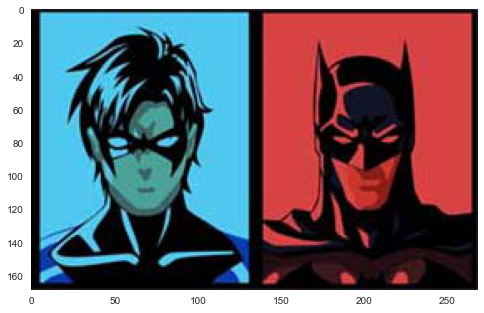

In [3]:
# Displaying Image

plt.style.use("seaborn")
plt.grid(False)
plt.imshow(image)
plt.show()
# plt.close()

## Quiz: How many dominating colors are there in this picture?
- 1
- 2
- 3
- 4

In [4]:
# Creating DataFrame

red = []
green = []
blue = []

for row in image:
    for pixel in row:
        red.append(pixel[0])
        green.append(pixel[1])
        blue.append(pixel[2])
        
batman_df = pd.DataFrame({"red": red, 
                         "green": green, 
                         "blue": blue})

In [5]:
batman_df.head()

,red,green,blue
0,36,28,25
1,39,21,19
2,52,20,21
3,61,27,28
4,37,15,18


In [6]:
# As values are from 0-255 we can do some rescaling

batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_green'] = whiten(batman_df['green'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])

In [7]:
batman_df.head()

,red,green,blue,scaled_red,scaled_green,scaled_blue
0,36,28,25,0.450157,0.370103,0.279912
1,39,21,19,0.487671,0.277577,0.212733
2,52,20,21,0.650227,0.264359,0.235126
3,61,27,28,0.762767,0.356885,0.313502
4,37,15,18,0.462662,0.198269,0.201537


In [8]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[["scaled_red", "scaled_blue", "scaled_green"]], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({"num_clusters": num_clusters, "distortions": distortions})


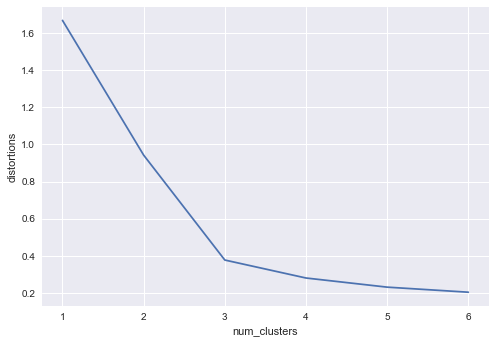

In [9]:
# Create a line plot of num_clusters and distortions

sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()
plt.close()

## Information from the Elbow Plot
From the above built Elbow plot we can conlude that there are optimally - **3 clusters** - in the dataset

In [10]:
cluster_centers, _ = kmeans(batman_df[['scaled_red', 'scaled_green', 'scaled_blue']], 3)

In [11]:
colors = []

# Find Standard Deviations
r_std, g_std, b_std = batman_df[['red', 'blue', 'green']].std()

# Scale actual RGB values in range of 0-1
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std/255,
        scaled_g * g_std/255,
        scaled_b * b_std/255
    ))

In [13]:
# Dimensions: 3 x 3 (N X 3 matrix)

colors

[(0.808263120676783, 0.3070014888319207, 0.22535240180342453),
 (0.06232381225691014, 0.06173261484498546, 0.06303728652704638),
 (0.3233488881684396, 0.8662475045422579, 0.7295469362964425)]

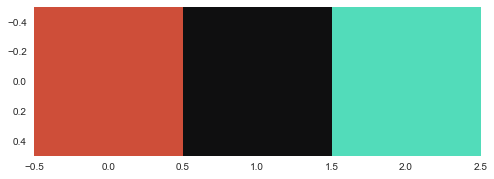

In [14]:
# Dimensions: 1 x 3 x 3 (1 X N x 3 matrix)

plt.imshow([colors])
plt.grid(False)
plt.show()


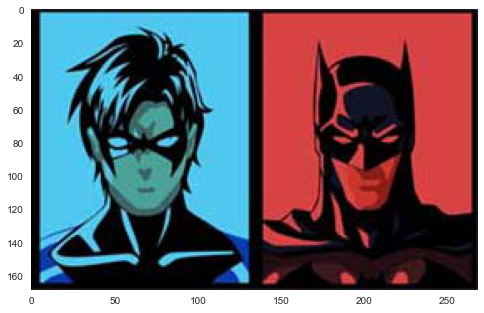

In [15]:
plt.grid(False)
plt.imshow(image)
plt.show()

## Conclusion
There are 3 dominating colors in the picture